## *Capstone Project One*: Iceberg or ship classification, [kaggle Statoil/C-CORE Iceberg Classifier Challenge](https://www.kaggle.com/c/statoil-iceberg-classifier-challenge)

January 2018

## Abstract

toc

## 1. Introduction

In the movie Titanic, the drifting icebergs were monitored by human's eye, which is uneffienct and not reliable. Nowadays, people use satellite data for the detecting drifting icebergs. This is especially important for the safety of ships or oil stations in a harsh environment.

The satellite radar works as bouncing a signal off an object and receive the backscattering signal from the object. The received signal is translated into an image. And through that image we can apply classifiers to detect if there are threaten icebergs in that image area. 

There are several factors to be consider: first, the radar signal contains H and V parts. During the backscattering on an object, the H and V parts will change differently due to the physical propeties of the object. Thus, the change of the two parts contains important information [[1]](http://www.nrcan.gc.ca/node/9567). In this kaggle challenge, dual-polarization image was give with two channels: HH (horizonal transmit and horizontal receive) and HV (horizonal transmit and vertical reveive). Second, the image is affected by the weather conditions such as the speed of the wind. High wind will generate a brighter background and low wind will generate a darker background. Third is the incidence angle the radar transmit and receive data. The ocean background will be darker at a higher incident angle.

Client of the project would be remote sensing companies like [C-CORE](https://www.c-core.ca/).

## 2. Analysis
### 2.1 data import
There are two data file available from this kaggle challenge: train.json (196.3 MB) and test.json (1.52 GB). The test.json contains data without labels. The predicted label from a team will be evaluated in the public leaderboard which contains 20% of the test data. All the precited label will be evaluated after the deadline of the chanllege (January 23, 2018)


In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
#Load the data.
train_pd = pd.read_json("train.json")
test_pd = pd.read_json("test.json")

### 2.2 data exploration

In [56]:
train_pd.tail()

,band_1,band_2,id,inc_angle,is_iceberg
1599,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712077999999998, ...",04e11240,na,0
1600,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",c7d6f6f8,na,0
1601,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",bba1a0f1,na,0
1602,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",7f66bb44,na,0
1603,"[-19.909191, -20.678406, -20.208834, -18.42441...","[-24.44487, -24.956001, -27.722103, -26.078417...",9d8f326c,na,0


In [57]:
test_pd.tail()

,band_1,band_2,id,inc_angle
8419,"[-25.082357, -26.71583, -24.599827, -25.082571...","[-25.860718, -23.29442, -25.860861, -25.334354...",16ee9b50,34.795500
8420,"[-21.031391143798828, -21.031391143798828, -21...","[-23.755836486816406, -23.755836486816406, -23...",5a599eb7,32.246683
8421,"[-28.609278, -26.514626, -26.514679, -26.83061...","[-28.609278, -29.437183, -30.35239, -31.375494...",df30d6dd,39.503200
8422,"[-27.068821, -27.068892, -23.970854, -22.38730...","[-29.991381, -29.163599, -24.886002, -27.71266...",18af95b1,33.638000
8423,"[-25.438865661621094, -25.438865661621094, -25...","[-23.85527801513672, -23.85527801513672, -23.8...",27d788c8,36.758181


In [104]:
print("number of training sample:", len(train_pd))
print("number of testing sample:", len(test_pd))
#print the percentage of iceberg in the training data
print("iceberg percentage in training sample: %.2f%%" % sum(train_pd['is_iceberg']/len(train_pd)*100))

number of training sample: 1604
number of testing sample: 8424
iceberg percentage in training sample: 46.95%


In [90]:
#replace 'na' with the average of the inc_angle
i=0
ls=[]
angle=np.array(train_pd['inc_angle'])
for a in angle:
    if a == 'na':
        i = i+1
    else:
        ls.append(a)
        
#calculate the average angle with the available data
ave=sum(ls)/(len(angle)-i)

#asign the 'na' data with the average value and convert to float32
angle[angle=='na']=ave
angle = angle.astype(np.float32)

In [106]:
# process the training data
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train_pd["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train_pd["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

# process the testing data
X_band_test_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_pd["band_1"]])
X_band_test_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_pd["band_2"]])
X_test = np.concatenate([X_band_test_1[:, :, :, np.newaxis]
                          , X_band_test_2[:, :, :, np.newaxis],((X_band_test_1+X_band_test_2)/2)[:, :, :, np.newaxis]], axis=-1)

For future convinience (faster reading speed), the .json was converted and saved as .npy file by pd.read_json() and np.save()

output files:

X_train.npy

X_test.npy

angle.npy

test_id.npy

target_train.npy

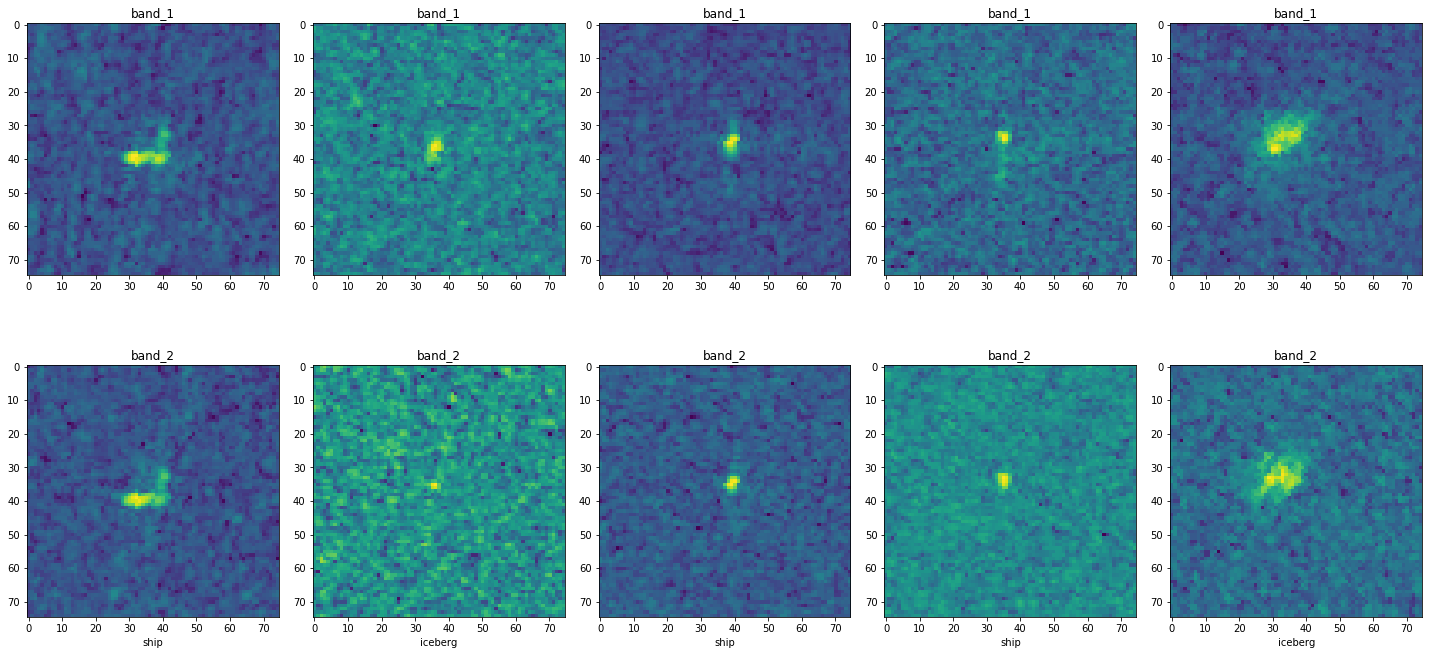

In [152]:
plt.figure(figsize=(20,10))
for example in range(1,6):
   
    plt.subplot(2,5,example)
    plt.imshow(X_band_1[example])
    plt.title('band_1')

    plt.subplot(2,5,5+example)
    plt.imshow(X_band_2[example])
    plt.title('band_2')
    if train_pd['is_iceberg'][example] == 1:
        plt.xlabel('iceberg')
    else:
        plt.xlabel('ship')

plt.tight_layout()